## Setup

In [5]:
import sys
import os
sys.path.append(os.path.abspath('../'))
import util
import ts_util
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timezone
from numba import njit
import pickle
import os
import sqlite3
from dotenv import load_dotenv
import yfinance as yf
import strategies
load_dotenv()

True

In [7]:
reload(util)
reload(ts_util)

<module 'ts_util' from 'c:\\Users\\joshu\\Documents\\Github\\Trading-Bot\\Uncon Backtest\\ts_util.py'>

In [8]:
kraken_coin_data = util.get_exchange_coins('kraken')
kraken_coin_ids = [coin['coin_id'] for coin in kraken_coin_data]
kraken_symbols = [coin['base'].lower() for coin in kraken_coin_data]
tradable_kraken_coins = util.get_tradable_kraken_coins()
# TIME IS CLOSE TIME
all_data = util.get_all_ochl()
btc_ohlc = all_data[all_data['symbol'] == 'btc'].drop(['symbol', 'coin_id', 'name'], axis=1).set_index('time_rank')
btc_ohlc[['open', 'high', 'low', 'close']] = np.log(btc_ohlc[['open', 'high', 'low', 'close']])
btc_ohlc.sort_index(inplace=True)
total_date_range = pd.date_range(start='2018-02-15 00:00:00+00:00', end=btc_ohlc.index[-1], freq='h', tz=timezone.utc)
btc_ohlc = btc_ohlc.reindex(total_date_range, method='ffill')
btc_ret = btc_ohlc['close'].diff() # if index is t, then ret[t] = close[t] - close[t-1]
in_sample_btc_ohlc = btc_ohlc.loc['2018-02-15':'2023-12-31']
out_of_sample_btc_ohlc = btc_ohlc.loc['2024-01-01':]
len(set(out_of_sample_btc_ohlc.index).difference(set(btc_ohlc.index)))+len(set(in_sample_btc_ohlc.index).difference(set(btc_ohlc.index)))  # should be empty

0

## First Look

<Axes: >

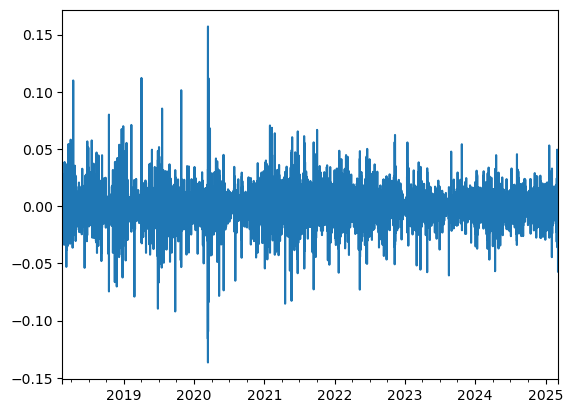

In [17]:
btc_ret.plot()

## Autocorrelation


(-0.1, 0.1)

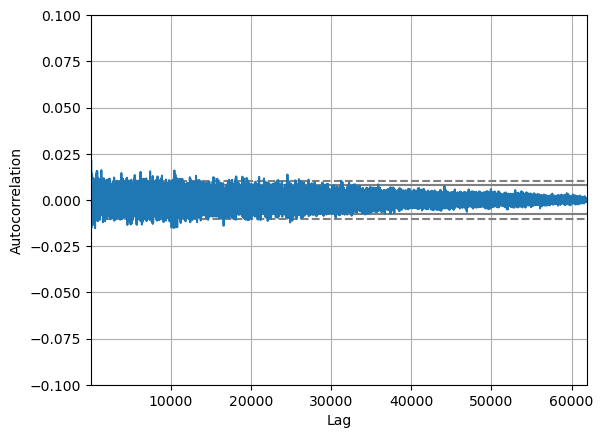

In [ ]:
from pandas.plotting import autocorrelation_plot
ax = autocorrelation_plot(btc_ret.dropna())
ax.set_ylim([-.1, .1])

(-0.1, 0.1)

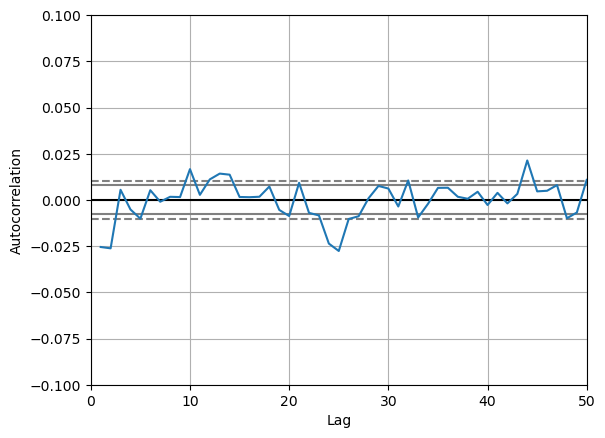

In [13]:
ax = autocorrelation_plot(btc_ret.dropna())
ax.set_xlim([0, 50])
ax.set_ylim([-.1, .1])


This means that were are free to permute series returns

## Volatility

In [15]:
btc_ret

2018-02-15 00:00:00+00:00         NaN
2018-02-15 01:00:00+00:00   -0.009828
2018-02-15 02:00:00+00:00    0.003405
2018-02-15 03:00:00+00:00    0.018427
2018-02-15 04:00:00+00:00    0.009372
                               ...   
2025-03-08 14:00:00+00:00    0.000046
2025-03-08 15:00:00+00:00    0.000151
2025-03-08 16:00:00+00:00    0.000788
2025-03-08 17:00:00+00:00   -0.002423
2025-03-08 18:00:00+00:00   -0.002347
Freq: h, Name: close, Length: 61891, dtype: float64